In [2]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [3]:
df = pd.read_csv("Social_Network_Ads.csv")
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [5]:
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])

df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0


In [6]:
x = df.iloc[:,1:-1]
y = df.iloc[:,-1]

y.tail()

395    1
396    1
397    1
398    0
399    1
Name: Purchased, dtype: int64

In [10]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)

In [11]:
clf = KNeighborsClassifier()

#training
clf.fit(x_train,y_train)

#testing
y_pred = clf.predict(x_test)

D:\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


              precision    recall  f1-score   support

           0       0.84      0.91      0.88        54
           1       0.77      0.65      0.71        26

    accuracy                           0.82        80
   macro avg       0.81      0.78      0.79        80
weighted avg       0.82      0.82      0.82        80



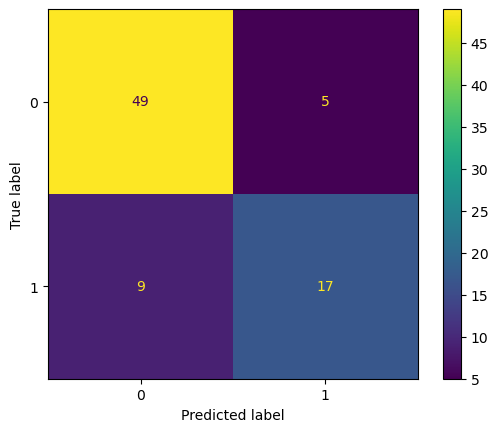

In [12]:
print(classification_report(y_pred,y_test))

cm = confusion_matrix(y_pred,y_test)
cmd = ConfusionMatrixDisplay(cm)

import matplotlib.pyplot as plt
cmd.plot()